In [3]:

from splinter import Browser
from bs4 import BeautifulSoup
import requests
import math
import dateutil
import datetime as dt
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier 
import scipy as sc 
import seaborn as sns 
import joblib
from sklearn.preprocessing import StandardScaler
from joblib import dump, load



# from webdriver_manager.chrome import ChromeDriverManager

## Reading in 2021 Data Frames 

In [4]:
manhat_2021_df = pd.read_excel('../data/manhat_2021.xlsx')
bronx_2021_df = pd.read_excel('../data/bronx_2021.xlsx')
brooklyn_2021_df = pd.read_excel('../data/brooklyn_2021.xlsx')
queens_2021_df = pd.read_excel('../data/queens_2021.xlsx')
staten_2021_df = pd.read_excel('../data/staten_2021.xlsx')



## Creating Soup

In [5]:
# from webdriver_manager.chrome import ChromeDriverManager
# executable_path = {'executable_path': ChromeDriverManager().install()}
# browser = Browser('chrome', **executable_path, headless=False)
nyc_soup = BeautifulSoup(requests.get("https://www1.nyc.gov/site/finance/taxes/property-annualized-sales-update.page").text, "html.parser")

## Finding and Fetching urls 

In [6]:
url_list = []

for tr in list(nyc_soup.find_all("tr"))[23:]: 
    try:
        url_list.append(f"https://www1.nyc.gov{tr.find_all('a')[1]['href']}")
    except:
        pass

url_list







['https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2020/2020_manhattan.xlsx',
 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2020/2020_bronx.xlsx',
 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2020/2020_brooklyn.xlsx',
 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2020/2020_queens.xlsx',
 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2020/2020_staten_island.xlsx',
 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2019/2019_manhattan.xlsx',
 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2019/2019_bronx.xlsx',
 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2019/2019_brooklyn.xlsx',
 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/2019/2019_queens.xlsx',
 'https://www1.nyc.gov

## Readinng in each df and adding to a list. 

In [7]:
list_df = []
for url in url_list:
    try:
        list_df.append(pd.read_excel(url))
    except:
        print(url)


list_df[10]


,"MANHATTAN ANNUALIZE SALE FOR 2018. (All Sales From January 1, 2018 - December 31, 2018)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Sales File as of 4/11/2019. Coop Sales Files ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Neighborhood Name and Descriptive Data is as o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
4,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NaN,A4,189 EAST 7TH STREET,NaN,...,1,0,1,987,2183,1860,1,A4,0,2018-05-23 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17040,1,WASHINGTON HEIGHTS UPPER,46 CONDO STORE BUILDINGS,4,2164,1010,NaN,RK,4260 BROADWAY,COM10,...,0,1,1,0,1218,0,4,RK,0,2018-08-03 00:00:00
17041,1,WASHINGTON HEIGHTS UPPER,46 CONDO STORE BUILDINGS,4,2164,1011,NaN,RK,4260 BROADWAY,COM11,...,0,1,1,0,522,0,4,RK,0,2018-08-03 00:00:00
17042,1,WASHINGTON HEIGHTS UPPER,46 CONDO STORE BUILDINGS,4,2164,1012,NaN,RK,4260 BROADWAY,COM12,...,0,1,1,0,1025,0,4,RK,0,2018-08-03 00:00:00
17043,1,WASHINGTON HEIGHTS UPPER,46 CONDO STORE BUILDINGS,4,2164,1013,NaN,RK,4260 BROADWAY,COM13,...,0,1,1,0,1061,0,4,RK,0,2018-08-03 00:00:00


## Getting rid of un needed rows

In [8]:
list_df_2020_2018 = list_df[0:10]
list_df_2020_2018[0][7:]

,MANHATTAN ANNUAL SALES FOR CALENDAR YEAR 2020,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
7,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377,72,NaN,B9,231 EAST 7TH,NaN,...,2,0,2,1718,5154,1901,1,B9,0,2020-10-02 00:00:00
8,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,66,NaN,C0,243 EAST 7TH STREET,NaN,...,3,0,3,2381,3084,1899,1,C0,0,2020-10-31 00:00:00
9,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,66,NaN,C0,243 EAST 7TH STREET,NaN,...,3,0,3,2381,3084,1899,1,C0,4350000,2020-07-16 00:00:00
10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,372,10,NaN,C7,274 EAST 3RD,NaN,...,9,1,10,2021,6445,1900,2,C7,0,2020-12-27 00:00:00
11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,374,1,NaN,C7,301-303 EAST 4TH STREET,NaN,...,8,2,10,1501,6929,1900,2,C7,3672530,2020-11-24 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12882,1,WASHINGTON HEIGHTS UPPER,33 EDUCATIONAL FACILITIES,4,2180,35,NaN,W3,554 FT WASHINGTON AVENUE,NaN,...,0,2,2,19300,14040,1930,4,W3,12000000,2020-10-22 00:00:00
12883,1,WASHINGTON HEIGHTS UPPER,37 RELIGIOUS FACILITIES,4,2170,118,NaN,M1,37-41 HILLSIDE AVENUE,NaN,...,0,1,1,20375,5200,1959,4,M1,8000000,2020-08-20 00:00:00
12884,1,WASHINGTON HEIGHTS UPPER,43 CONDO OFFICE BUILDINGS,4,2177,1101,NaN,RB,"40 PINEHURST AVENUE, CFA",CFA,...,0,1,1,0,0,2016,4,RB,0,2020-04-29 00:00:00
12885,1,WASHINGTON HEIGHTS UPPER,43 CONDO OFFICE BUILDINGS,4,2177,1102,NaN,RB,"40 PINEHURST AVENUE, CFB",CFB,...,0,1,1,0,0,2016,4,RB,0,2020-04-29 00:00:00


## Creating 2021 Data Frame 

In [9]:
manhat_2021_df = manhat_2021_df[4:]
bronx_2021_df = bronx_2021_df[4:]
brooklyn_2021_df = brooklyn_2021_df[4:]
queens_2021_df = queens_2021_df[4:]
staten_2021_df = staten_2021_df[4:]

df_2021 = pd.concat([manhat_2021_df, bronx_2021_df, brooklyn_2021_df, queens_2021_df, staten_2021_df])
# df_2021.columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE_MENT', 'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE', 'SALE_DATE']

In [10]:
df_2021.columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE_MENT', 'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE', 'SALE_DATE']

## adding in column names and creating complete merged data named massive_df 

In [11]:


list_df_b4_2018 = list_df[11:][4:]




df_list = []

for current in list_df_b4_2018:
    header = current.iloc[3]
    new_df = current[4:]
    new_df.columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE_MENT', 'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE', 'SALE_DATE']
    df_list.append(new_df)

df_list_20_19 = []
for i in list_df_2020_2018:
    header = i.iloc[6]
    new_df_20_19 = i[7:]
    new_df_20_19.columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE_MENT', 'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE', 'SALE_DATE']
    df_list_20_19.append(new_df_20_19)


big_df = df_list_20_19 + df_list
no_outlier = []




massive_df = pd.concat(big_df)
massive_df


,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE_MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
7,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377,72,NaN,B9,231 EAST 7TH,NaN,...,2,0,2,1718,5154,1901,1,B9,0,2020-10-02 00:00:00
8,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,66,NaN,C0,243 EAST 7TH STREET,NaN,...,3,0,3,2381,3084,1899,1,C0,0,2020-10-31 00:00:00
9,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,66,NaN,C0,243 EAST 7TH STREET,NaN,...,3,0,3,2381,3084,1899,1,C0,4350000,2020-07-16 00:00:00
10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,372,10,NaN,C7,274 EAST 3RD,NaN,...,9,1,10,2021,6445,1900,2,C7,0,2020-12-27 00:00:00
11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,374,1,NaN,C7,301-303 EAST 4TH STREET,NaN,...,8,2,10,1501,6929,1900,2,C7,3672530,2020-11-24 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12669,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,7105,157,,V0,TURNER STREET,,...,0,0,0,18269,0,0,1,V0,498000,2003-06-25 00:00:00
12670,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,7105,163,,V0,TURNER STREET,,...,0,0,0,69089,0,0,1,V0,602000,2003-06-25 00:00:00
12671,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,7267,129,,G0,CLAY PIT ROAD,,...,0,0,0,7920,0,0,1,V0,127000,2003-03-28 00:00:00
12672,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,7346,25,,A3,306 BLOOMINGDALE ROAD,,...,1,0,1,13176,7902,2005,1,V0,0,2003-08-29 00:00:00


In [12]:
massive_df = pd.concat([massive_df, df_2021])

## Data CLeaning. Getting rid of Zeros then taking log of certian varible

In [13]:

massive_df['YEAR'] = pd.DatetimeIndex(massive_df['SALE_DATE']).year

massive_df= massive_df[massive_df['SALE_PRICE'] > 100]
massive_df= massive_df[massive_df['SALE_PRICE'] < 10000000 ]
massive_df= massive_df[massive_df['GROSS_SQUARE_FEET'] > 10]
massive_df= massive_df[massive_df['GROSS_SQUARE_FEET'] < 100000]
massive_df= massive_df[massive_df['LAND_SQUARE_FEET'] > 5]
massive_df= massive_df[massive_df['LAND_SQUARE_FEET'] < 25000]

massive_df = massive_df[massive_df['COMMERCIAL_UNITS'] != 0]
massive_df = massive_df[massive_df['RESIDENTIAL_UNITS'] != 0]
massive_df = massive_df[massive_df['YEAR_BUILT'] != 0]
massive_df = massive_df[massive_df['COMMERCIAL_UNITS'] < 40]
massive_df = massive_df[massive_df['RESIDENTIAL_UNITS'] < 500]
massive_df = massive_df[massive_df['YEAR_BUILT'] > 1875]


massive_df['SALE_PRICE'] = massive_df['SALE_PRICE'].astype(float)
massive_df['GROSS_SQUARE_FEET'] = massive_df['GROSS_SQUARE_FEET'].astype(float)
massive_df['LAND_SQUARE_FEET'] = massive_df['LAND_SQUARE_FEET'].astype(float)
massive_df['COMMERCIAL_UNITS'] = massive_df['COMMERCIAL_UNITS'].astype(float)
massive_df['RESIDENTIAL_UNITS'] = massive_df['RESIDENTIAL_UNITS'].astype(float)
massive_df['YEAR_BUILT'] = massive_df['YEAR_BUILT'].astype(float)
massive_df['BOROUGH'] = massive_df['BOROUGH'].astype(int)




massive_df['ln_SALE_PRICE'] = np.log(massive_df['SALE_PRICE'])
massive_df['ln_GROSS_SQUARE_FEET'] = np.log(massive_df['GROSS_SQUARE_FEET'])
massive_df['ln_LAND_SQUARE_FEET'] = np.log(massive_df['LAND_SQUARE_FEET'])

massive_df['ln_SALE_PRICE'] = np.nan_to_num(massive_df['ln_SALE_PRICE'])
massive_df['ln_GROSS_SQUARE_FEET'] = np.nan_to_num(massive_df['ln_GROSS_SQUARE_FEET'])
massive_df['ln_LAND_SQUARE_FEET'] = np.nan_to_num(massive_df['ln_LAND_SQUARE_FEET'])

massive_df['YEAR_BUILT'].min()

ln_df = massive_df[['ln_SALE_PRICE', 'ln_GROSS_SQUARE_FEET', 'ln_LAND_SQUARE_FEET','RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS','YEAR_BUILT','ZIP_CODE', 'YEAR', 'BOROUGH']]



# massive_df = massive_df[~np.all(massive_df == 0, axis=1)]


## Getting rid of zeros in df due to result of log transform. Elimating outliers in Gross Square Feet

In [14]:
ln_df= ln_df[ln_df['ln_SALE_PRICE'] != 0]
ln_df= ln_df[ln_df['ln_GROSS_SQUARE_FEET'] != 0]
ln_df= ln_df[ln_df['ln_GROSS_SQUARE_FEET'] > 4]
ln_df= ln_df[ln_df['ln_LAND_SQUARE_FEET'] != 0]


ln_df['ln_SALE_PRICE'] = ln_df['ln_SALE_PRICE'].astype(float)
ln_df['ln_GROSS_SQUARE_FEET'] = ln_df['ln_GROSS_SQUARE_FEET'].astype(float)
ln_df['ln_LAND_SQUARE_FEET'] = ln_df['ln_LAND_SQUARE_FEET'].astype(float)
ln_df['COMMERCIAL_UNITS'] = ln_df['COMMERCIAL_UNITS'].astype(float)
ln_df['RESIDENTIAL_UNITS'] = ln_df['RESIDENTIAL_UNITS'].astype(float)
ln_df['YEAR_BUILT'] = ln_df['YEAR_BUILT'].astype(float)
ln_df['ZIP_CODE'] = ln_df['ZIP_CODE'].astype(int)



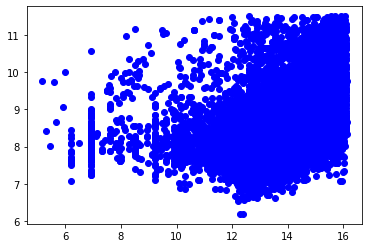

In [15]:
plt.scatter(ln_df['ln_SALE_PRICE'], ln_df['ln_GROSS_SQUARE_FEET'], color= 'blue')

# Scatter Plot for ln_gross_sqft and ln_land_sqft vs ln_sale_price

No handles with labels found to put in legend.


coef for Gross Square Feet is : 0.2805113429391727


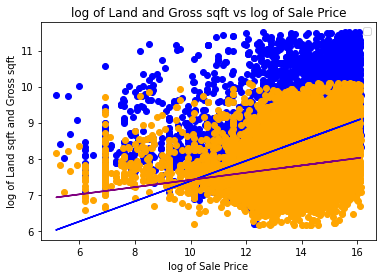

coef for Land Square Feet is : 0.1002917295128821


In [16]:
x = ln_df['ln_SALE_PRICE']
y = ln_df['ln_GROSS_SQUARE_FEET']
z = ln_df['ln_LAND_SQUARE_FEET']


plt.scatter(x, y, color= 'blue')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color= 'blue')
print(f'coef for Gross Square Feet is : {m}')
plt.scatter(x, z, color= 'orange')
m2, b2 = np.polyfit(x, z, 1)
plt.plot(x, m2*x+b2, color= 'purple')
plt.title('log of Land and Gross sqft vs log of Sale Price')
plt.xlabel('log of Sale Price')
plt.ylabel('log of Land sqft and Gross sqft')
plt.legend()
plt.show()
print(f'coef for Land Square Feet is : {m2}')


## 3D rotating scatter plot for ln_Sale_Price, ln_Gross_Square_Feet and ln_Land_Square_Feet

In [17]:
%matplotlib qt
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
 


def threeD_rotation():
    fig = plt.figure(figsize = (15, 10))
    ax = fig.add_subplot(projection ="3d")
    ax.scatter3D(z, y, x, color = "green")
    ax.set_xlabel('ln_Land_Square_Feet')
    ax.set_ylabel('ln_Gross_Square_Feet')
    ax.set_zlabel('ln_SALE_PRICE')
    for angle in range(0, 360):
        ax.view_init(30, angle)
        plt.draw()
        plt.pause(.001)
        plt.show()

threeD_rotation()


## Scatter plot for Commercial units vs log Sale Price


coef for COMMERCIAL_UNITS is : 0.23465029507086543


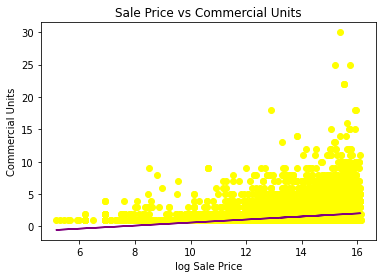

In [18]:
%matplotlib inline


Y = ln_df['COMMERCIAL_UNITS'] 
Y2 = ln_df['RESIDENTIAL_UNITS']

plt.scatter(x, Y, color= 'yellow')
m, b = np.polyfit(x, Y, 1)
plt.plot(x, m*x+b, color= 'purple')
plt.xlabel('log Sale Price')
plt.ylabel('Commercial Units')
plt.title('Sale Price vs Commercial Units')
print(f'coef for COMMERCIAL_UNITS is : {m}')
plt.show()



## Scatter plot for Residential units vs log Sale Price

coef for Residiential Units is: 2.9423892761528063


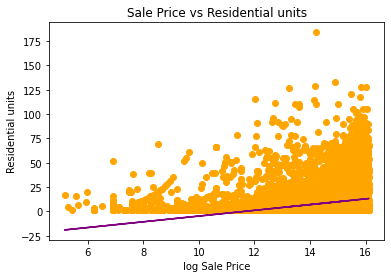

In [19]:
plt.scatter(x, Y2, color= 'orange')
m2, b2 = np.polyfit(x, Y2, 1)
plt.plot(x, m2*x+b2, color= 'purple')
plt.xlabel('log Sale Price')
plt.ylabel('Residential units')
plt.title('Sale Price vs Residential units')
print(f'coef for Residiential Units is: {m2}')
plt.show()

## Scatter Plot for Year Built vs log Sale Price

coef for Year Built is : -1.4253065923690293


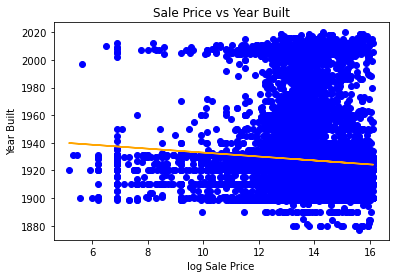

In [20]:
Y = ln_df['YEAR_BUILT']

plt.scatter(x, Y, color= 'blue')
m, b = np.polyfit(x, Y, 1)
plt.plot(x, m*x+b, color= 'orange')
plt.xlabel('log Sale Price')
plt.ylabel('Year Built')
plt.title('Sale Price vs Year Built')
print(f'coef for Year Built is : {m}')
plt.show()

## Creating a Data Frame without the Natural Log

In [21]:
non_ln_df = massive_df[['BOROUGH', 'TAX_CLASS_AT_PRESENT', 'LOT', 'ZIP_CODE', 'TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE', 'SALE_DATE', 'YEAR']]
non_ln_df

,BOROUGH,TAX_CLASS_AT_PRESENT,LOT,ZIP_CODE,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE,YEAR
11,1,2B,1,10009,10,1501.0,6929.0,1900.0,2,3672530.0,2020-11-24 00:00:00,2020
32,1,2B,6,10009,9,1587.0,6055.0,1900.0,2,1250000.0,2020-06-16 00:00:00,2020
33,1,2B,7,10009,9,1586.0,6000.0,1900.0,2,1250000.0,2020-06-16 00:00:00,2020
34,1,2B,37,10009,10,1920.0,7485.0,1920.0,2,37189.0,2020-09-01 00:00:00,2020
35,1,2B,37,10009,10,1920.0,7485.0,1920.0,2,20661.0,2020-09-01 00:00:00,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
8450,5,1,34,10302,3,5750.0,3465.0,1931.0,1,759500.0,2021-05-14 00:00:00,2021
8538,5,2A,40,10314,4,2523.0,3752.0,1931.0,2,900000.0,2021-07-01 00:00:00,2021
8539,5,4,9,10302,2,3090.0,1216.0,1932.0,4,475000.0,2021-10-08 00:00:00,2021
8542,5,1,7,10314,2,3045.0,1520.0,1970.0,1,586750.0,2021-07-28 00:00:00,2021


In [22]:
non_ln_df['GROSS_SQUARE_FEET'].max()

99375.0

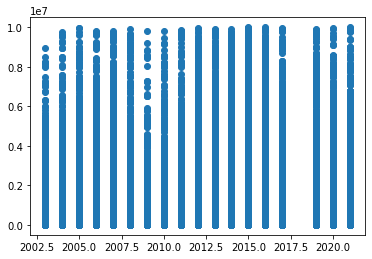

In [23]:
plt.scatter(non_ln_df['YEAR'], non_ln_df['SALE_PRICE'])

## Histograms for Sale Price, Gross Square Feet and Land Square Feet

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


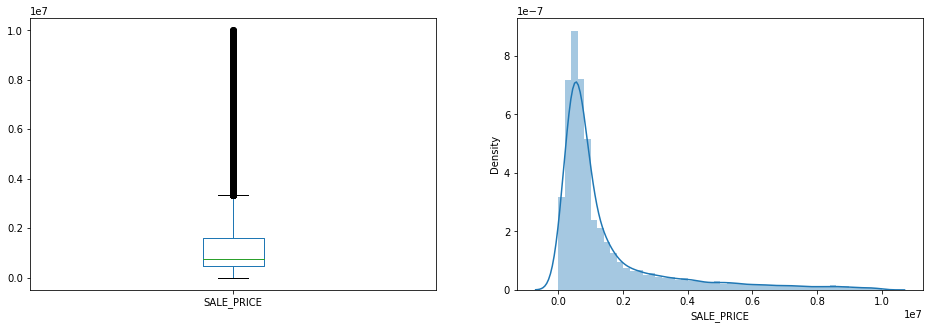

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


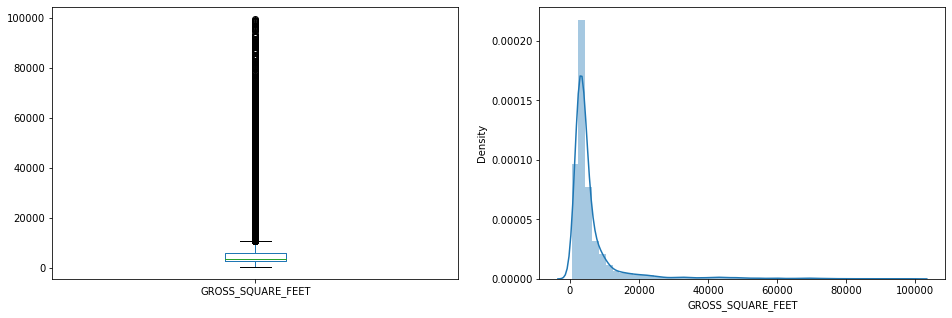

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


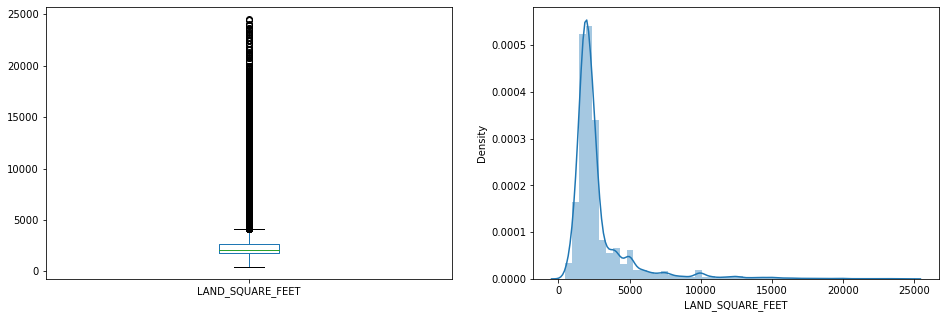

In [24]:
%matplotlib inline

plt.subplot(121), non_ln_df['SALE_PRICE'].plot.box(figsize=(16, 5))
plt.subplot(122), sns.distplot(non_ln_df['SALE_PRICE'])
plt.show()

plt.subplot(121), non_ln_df['GROSS_SQUARE_FEET'].plot.box(figsize=(16, 5))
plt.subplot(122), sns.distplot(non_ln_df['GROSS_SQUARE_FEET'])
plt.show()

plt.subplot(121), non_ln_df['LAND_SQUARE_FEET'].plot.box(figsize=(16, 5))
plt.subplot(122), sns.distplot(non_ln_df['LAND_SQUARE_FEET'])
plt.show()

## Histograms For ln_Sale_Price, ln_Gross_Square_Feet, ln_Land_Square_Feet

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


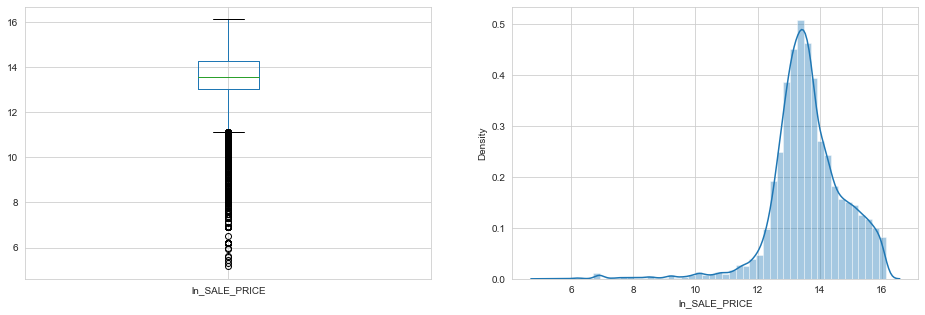

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


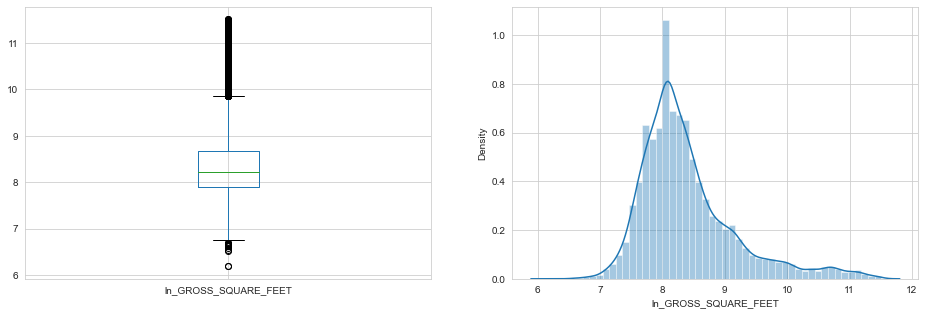

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


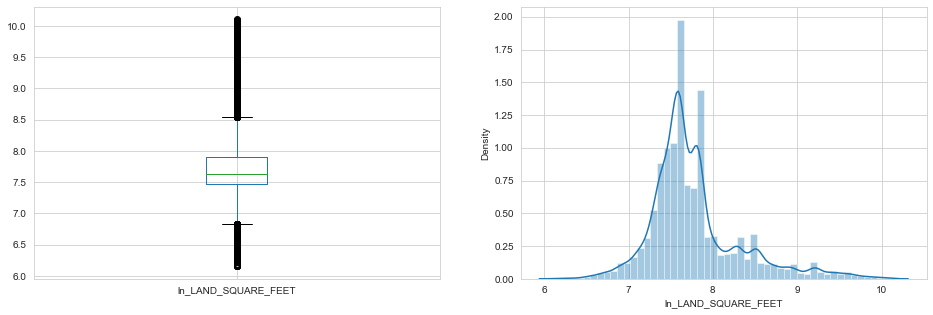

In [25]:
%matplotlib inline
sns.set_style('whitegrid')

plt.subplot(121), ln_df['ln_SALE_PRICE'].plot.box(figsize=(16, 5))
plt.subplot(122), sns.distplot(ln_df['ln_SALE_PRICE'])
plt.show()

plt.subplot(121), ln_df['ln_GROSS_SQUARE_FEET'].plot.box(figsize=(16, 5))
plt.subplot(122), sns.distplot(ln_df['ln_GROSS_SQUARE_FEET'])
plt.show()

plt.subplot(121), ln_df['ln_LAND_SQUARE_FEET'].plot.box(figsize=(16, 5))
plt.subplot(122), sns.distplot(ln_df['ln_LAND_SQUARE_FEET'])
plt.show()



## Correlation Heat Maps for non_ln_df and ln_df

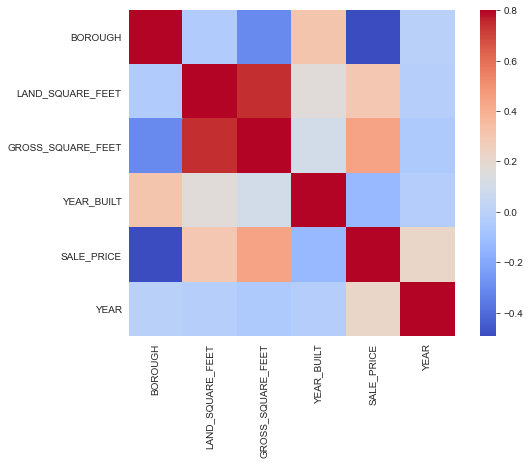

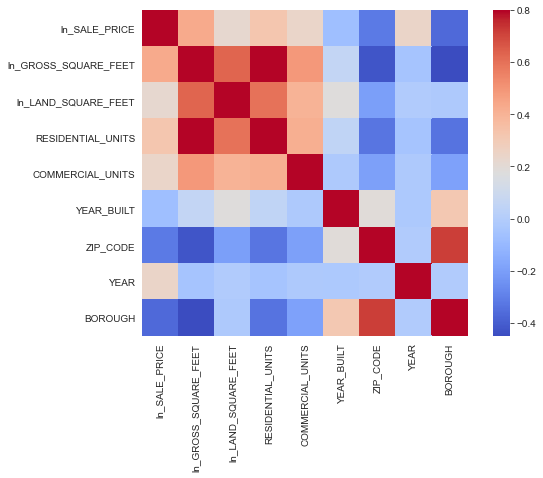

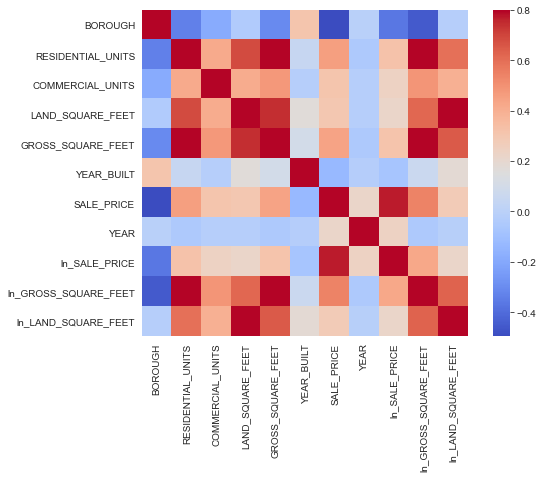

In [26]:
matrix_non_ln = non_ln_df.corr()
ax =plt.subplots(figsize=(9, 6)), sns.heatmap(matrix_non_ln, vmax=.8, square=True, cmap='coolwarm')

matrix_ln = ln_df.corr()
ax = plt.subplots(figsize=(9, 6)), sns.heatmap(matrix_ln, vmax=.8, square=True, cmap='coolwarm')


matrix_massive_df = massive_df.corr()
ax = plt.subplots(figsize=(9, 6)), sns.heatmap(matrix_massive_df, vmax=.8, square=True, cmap='coolwarm')




(array([2.6281e+04, 1.2120e+03, 4.7200e+02, 2.5600e+02, 6.2000e+01,
        2.0000e+01, 9.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1. ,  19.3,  37.6,  55.9,  74.2,  92.5, 110.8, 129.1, 147.4,
        165.7, 184. ]),
 <BarContainer object of 10 artists>)

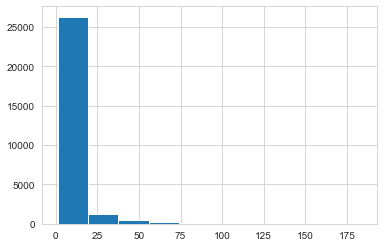

In [27]:
plt.hist(ln_df['RESIDENTIAL_UNITS'])

## Creating Year dummy varibles and adding it to existing df and dropping Zip Code

In [28]:
## BY Borough ##
year_dummies = pd.get_dummies(ln_df['YEAR'])
# zip_dummies = pd.get_dummies(ln_df['ZIP_CODE'])
ln_year_dum_df = pd.concat([ln_df, year_dummies], axis=1)

ln_year_dum_df = ln_year_dum_df.drop(columns='ZIP_CODE')
ln_year_dum_df
# matrix_ln = ln_zip_dum_df.corr()
# ax = plt.subplots(figsize=(9, 6)), sns.heatmap(matrix_ln, vmax=.8, square=True, cmap='coolwarm')


,ln_SALE_PRICE,ln_GROSS_SQUARE_FEET,ln_LAND_SQUARE_FEET,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,YEAR_BUILT,YEAR,BOROUGH,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2019,2020,2021
11,15.116391,8.843471,7.313887,8.0,2.0,1900.0,2020,1,0,0,...,0,0,0,0,0,0,0,0,1,0
32,14.038654,8.708640,7.369601,8.0,1.0,1900.0,2020,1,0,0,...,0,0,0,0,0,0,0,0,1,0
33,14.038654,8.699515,7.368970,8.0,1.0,1900.0,2020,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34,10.523768,8.920656,7.560080,8.0,2.0,1920.0,2020,1,0,0,...,0,0,0,0,0,0,0,0,1,0
35,9.936003,8.920656,7.560080,8.0,2.0,1920.0,2020,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8450,13.540416,8.150468,8.656955,2.0,1.0,1931.0,2021,5,0,0,...,0,0,0,0,0,0,0,0,0,1
8538,13.710150,8.230044,7.833204,3.0,1.0,1931.0,2021,5,0,0,...,0,0,0,0,0,0,0,0,0,1
8539,13.071070,7.103322,8.035926,1.0,1.0,1932.0,2021,5,0,0,...,0,0,0,0,0,0,0,0,0,1
8542,13.282354,7.326466,8.021256,1.0,1.0,1970.0,2021,5,0,0,...,0,0,0,0,0,0,0,0,0,1


## Creating Vif function that accounts for muliticolinearity. 
## If Vif = 1 no muliticolinearity 
## if 5 < Vif < 10 Then there is problamatic multicolenarity. 

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

dropped_df = ln_year_dum_df.drop(columns= ['YEAR', 'YEAR_BUILT', 'BOROUGH'], axis=1)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

vif_df = calc_vif(dropped_df)
vif_df

,variables,VIF
0,ln_SALE_PRICE,1.380151
1,ln_GROSS_SQUARE_FEET,3.604217
2,ln_LAND_SQUARE_FEET,1.778264
3,RESIDENTIAL_UNITS,2.859482
4,COMMERCIAL_UNITS,1.346165
5,2003,48.506142
6,2004,51.851679
7,2005,49.895797
8,2006,43.143122
9,2007,39.384673


## Creating a split by burough function to split the data frame into 5 separate burrows. 

In [30]:
def split_BOROUGH(dt):
    # dt['BOROUGH'] = dt['BOROUGH']
    return [dt[dt['BOROUGH'] == y] for y in range(1, 6)]


split = split_BOROUGH(ln_year_dum_df)



Manhattan_df = split[0]
Bronx_df = split[1]
Brooklyn_df = split[2]
Queens_df = split[3]
Staten_Island_df = split[4]

In [31]:
len(Manhattan_df['YEAR'])

4277

In [32]:
X = ln_year_dum_df.drop(columns= ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
y = ln_year_dum_df['ln_SALE_PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=1)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

manhat_X = Manhattan_df.drop(columns= ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
manhat_y = Manhattan_df['ln_SALE_PRICE']

bronx_X = Bronx_df.drop(columns= ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
bronx_y = Bronx_df['ln_SALE_PRICE']

brook_X = Brooklyn_df.drop(columns= ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
brook_y = Brooklyn_df['ln_SALE_PRICE']

queen_X = Queens_df.drop(columns= ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
queen_y = Queens_df['ln_SALE_PRICE']

staten_X = Staten_Island_df.drop(columns= ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
staten_y = Staten_Island_df['ln_SALE_PRICE']

print(f'the R squared score for the training data is: {linear_reg.score(X_train, y_train)}')
print(f'the R squared for Manhattan is: {linear_reg.score(manhat_X, manhat_y)}')
print(f'the R squared for the Bronx is: {linear_reg.score(bronx_X, bronx_y)}')
print(f'the R squared for Queens is: {linear_reg.score(queen_X, queen_y)}')
print(f'the R squared for Brooklyn is: {linear_reg.score(brook_X, brook_y)}')
print(f'the R squared for Staten Island is: {linear_reg.score(staten_X, staten_y)}')



# coef_array = linear_reg.coef_


# coef_df = pd.DataFrame(coef_array)
# coef_df = pd.concat([coef_df, years], axis=1)
# coef_df.columns = ['manhat_Coef', 'Year']
# coef_df[5:]

# plt.scatter(coef_df[5:]['Year'],coef_df[5:]['manhat_Coef'] )

the R squared score for the training data is: 0.2777039610595673
the R squared for Manhattan is: -0.20020285429506823
the R squared for the Bronx is: 0.4238689398411929
the R squared for Queens is: 0.18187354121827115
the R squared for Brooklyn is: 0.20501588814011884
the R squared for Staten Island is: -0.08343681130500191


## ML Linear Regression for Manhatten 

In [33]:
X = Manhattan_df.drop(columns= ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
y = Manhattan_df['ln_SALE_PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=1)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
print(linear_reg.predict(X_test))
print(linear_reg.score(X_train, y_train))
print(linear_reg.score(X_test, y_test))
manhat_coef_array = linear_reg.coef_
manhat_coef_array

[15.08340705 15.04239226 15.03954305 ... 14.5885398  13.76728657
 14.10584371]
0.09175804126677256
0.07029827894110496


array([ 0.25176286, -0.14450543, -0.00141092,  0.01691886, -0.00112667,
       -0.87234128, -0.52099043, -0.16658673, -0.06286104,  0.15273363,
       -0.0859584 , -0.39700779, -0.31950509, -0.1855195 ,  0.11215541,
        0.26997184,  0.42676455,  0.48635144,  0.38668978,  0.50055208,
       -0.02167409,  0.09522738,  0.20199823])

## Creating Years varible to add to Coef Array's

In [35]:
years = ['ln_gross_square_feet', 'ln_land_square_feet', 'residential_units', 'commerical_units', 'year_built', 2003, 2004, 2005, 2006, 2007, 2008,  2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2019, 2020, 2021]
years = pd.DataFrame(years)

## Making manhat_coef_arry into pandas df cleaning it and plotting it. 

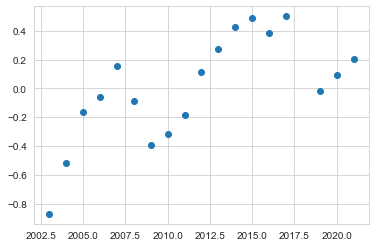

In [36]:
manhat_coef_df = pd.DataFrame(manhat_coef_array)
manhat_coef_df = pd.concat([manhat_coef_df, years], axis=1)
manhat_coef_df.columns = ['manhat_Coef', 'Year']
manhat_coef_df[5:]

plt.scatter(manhat_coef_df[5:]['Year'],manhat_coef_df[5:]['manhat_Coef'] )

## ML Linear Regression for Bronx

In [37]:
X = Bronx_df.drop(columns= ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
y = Bronx_df['ln_SALE_PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=1)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg.predict(X_test)
print(linear_reg.score(X_train, y_train))
print(linear_reg.score(X_test, y_test))
bronx_coef_array = linear_reg.coef_

0.5255197719197274
0.5653776212104635


## Making bronx_coef_df into pandas df cleaning it and plotting it. 

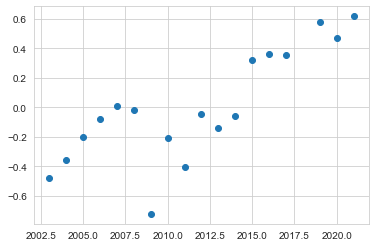

In [38]:
bronx_coef_df = pd.DataFrame(bronx_coef_array)
bronx_coef_df = pd.concat([bronx_coef_df, years], axis=1)
bronx_coef_df.columns = ['Bronx_Coef', 'Year']

plt.scatter(bronx_coef_df[5:]['Year'],bronx_coef_df[5:]['Bronx_Coef'] )

In [39]:
bronx_coef_df

,Bronx_Coef,Year
0,0.583548,ln_gross_square_feet
1,0.239345,ln_land_square_feet
2,0.003555,residential_units
3,0.038213,commerical_units
4,-0.003866,year_built
5,-0.477131,2003
6,-0.357397,2004
7,-0.199430,2005
8,-0.081580,2006
9,0.011242,2007


## ML Linear Regression for Brooklyn

In [40]:
X = Brooklyn_df.drop(columns= ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
y = Brooklyn_df['ln_SALE_PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=1)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg.predict(X_test)
print(linear_reg.score(X_train, y_train))
print(linear_reg.score(X_test, y_test))
brook_coef_array = linear_reg.coef_

0.22301063424159384
0.25861592382017207


## Making brooklyn_coef_arry into pandas df cleaning it and plotting it. 

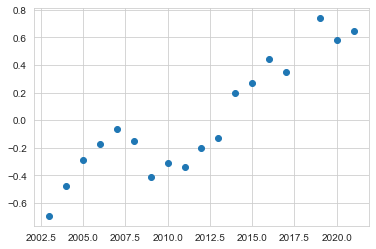

In [41]:
brooklyn_coef_df = pd.DataFrame(brook_coef_array)
brooklyn_coef_df = pd.concat([brooklyn_coef_df, years], axis=1)
brooklyn_coef_df.columns = ['Brooklyn_Coef', 'Year']

plt.scatter(brooklyn_coef_df[5:]['Year'],brooklyn_coef_df[5:]['Brooklyn_Coef'] )

In [42]:
brooklyn_coef_df

,Brooklyn_Coef,Year
0,0.471566,ln_gross_square_feet
1,0.140400,ln_land_square_feet
2,0.002578,residential_units
3,0.051843,commerical_units
4,-0.002316,year_built
5,-0.695243,2003
6,-0.474451,2004
7,-0.286116,2005
8,-0.175463,2006
9,-0.063056,2007


## ML Linear Regression for Staten Island

In [43]:
X = Staten_Island_df.drop(columns= ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
y = Staten_Island_df['ln_SALE_PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=1)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg.predict(X_test)
print(linear_reg.score(X_train, y_train))
print(linear_reg.score(X_test, y_test))
staten_coef_array = linear_reg.coef_

0.22248729652833898
0.11307299279852545


## Making staten_coef_array into pandas df cleaning it and plotting it. 

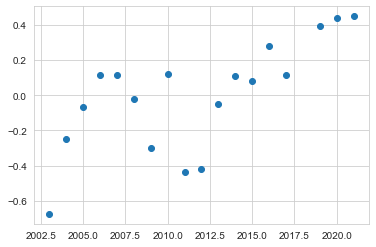

In [44]:
staten_coef_array = pd.DataFrame(staten_coef_array)
staten_coef_array = pd.concat([staten_coef_array, years], axis=1)
staten_coef_array.columns = ['Staten_Coef', 'Year']

plt.scatter(staten_coef_array[5:]['Year'],staten_coef_array[5:]['Staten_Coef'] )

In [45]:
staten_coef_array

,Staten_Coef,Year
0,0.312864,ln_gross_square_feet
1,0.317261,ln_land_square_feet
2,-0.039288,residential_units
3,0.104480,commerical_units
4,0.000886,year_built
5,-0.673228,2003
6,-0.247488,2004
7,-0.065284,2005
8,0.116876,2006
9,0.112707,2007


## ML Linear Regression for Queens

In [46]:
X = Queens_df.drop(columns= ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
y = Queens_df['ln_SALE_PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=1)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg.predict(X_test)
print(linear_reg.score(X_train, y_train))
print(linear_reg.score(X_test, y_test))
queens_coef_array = linear_reg.coef_

0.247702839328662
0.27023939433502897


## Making queens_coef_array into pandas df cleaning it and plotting it. 

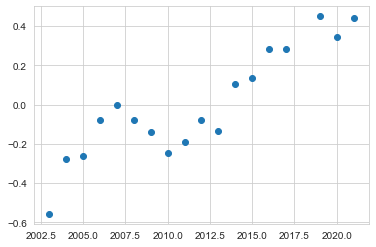

In [47]:
queens_coef_array = pd.DataFrame(queens_coef_array)
queens_coef_array = pd.concat([queens_coef_array, years], axis=1)
queens_coef_array.columns = ['Queens_Coef', 'Year']

plt.scatter(queens_coef_array[5:]['Year'],queens_coef_array[5:]['Queens_Coef'] )

In [ ]:
queens_coef_array

,Queens_Coef,Year
0,0.506011,ln_gross_square_feet
1,0.080786,ln_land_square_feet
2,-0.016407,residential_units
3,0.126353,commerical_units
4,0.002073,year_built
5,-0.556489,2003
6,-0.278088,2004
7,-0.260693,2005
8,-0.077417,2006
9,-0.000030,2007


## Creating two differently created line plots for nyc Housing Prices since 2003

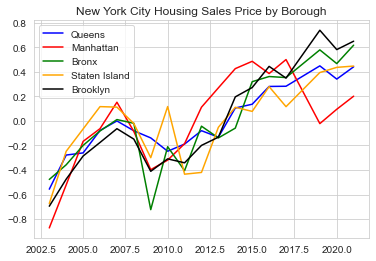

<Figure size 8000x80 with 0 Axes>

In [48]:

fig, ax = plt.subplots()
handles, labels = ax.get_legend_handles_labels()

queen_label, = plt.plot(queens_coef_array[5:]['Year'],queens_coef_array[5:]['Queens_Coef'], color='blue', label= 'Queens' )
manhat_label, = plt.plot(manhat_coef_df[5:]['Year'],manhat_coef_df[5:]['manhat_Coef'], color='red', label= 'Manhattan' )
bronx_label, = plt.plot(bronx_coef_df[5:]['Year'],bronx_coef_df[5:]['Bronx_Coef'], color='green', label= 'Bronx'  )
staten_label, = plt.plot(staten_coef_array[5:]['Year'],staten_coef_array[5:]['Staten_Coef'], color='orange', label = 'Staten Island')
brook_label, = plt.plot(brooklyn_coef_df[5:]['Year'],brooklyn_coef_df[5:]['Brooklyn_Coef'], color='black', label = 'Brooklyn' )
ax.set_title('New York City Housing Sales Price by Borough')
# plt.legend(handles= [queen_label, manhat_label, bronx_label, staten_label, brook_label])
plt.legend([queen_label, manhat_label, bronx_label, staten_label, brook_label], ['Queens', 'Manhattan', 'Bronx', 'Staten Island', 'Brooklyn' ])
figure(figsize=(100, 1), dpi=80)
plt.show()

# fig, ax = plt.subplots(figsize=(15, 8))
# queens_plot, =sns.lineplot(data=queens_coef_array[5:], x='Year', y='Queens_Coef')
# brook_plot, = sns.lineplot(data=brooklyn_coef_df[5:], x='Year', y='Brooklyn_Coef')
# manhat_plot, = sns.lineplot(data=manhat_coef_df[5:], x='Year', y='manhat_Coef')
# staten_plot, = sns.lineplot(data=staten_coef_array[5:], x='Year', y='Staten_Coef')
# bronx_plot, = sns.lineplot(data=bronx_coef_df[5:], x='Year', y='Bronx_Coef')
# plt.legend([queens_plot, brook_plot, manhat_plot, staten_plot, bronx_plot], ['Queens', 'Brooklyn', 'Manhattan', 'Staten Island', 'Bronx' ])




## Logistic Regression ML

In [49]:
from sklearn import preprocessing
from sklearn import utils

classifier = LogisticRegression()

X = ln_year_dum_df.drop(columns= ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
y = ln_year_dum_df['ln_SALE_PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=1)


lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

classifier.fit(X_train, training_scores_encoded)

# print(f"Logistic Regression Training Data Score: {classifier.score(X_train, y_train)}")
# print(f"Logistic Regression Testing Data Score: {classifier.score(X_test, y_test)}")

[2233  975 3721 ... 2248  203 2934]
continuous
multiclass
multiclass


KeyboardInterrupt: 

## Making NYC coef array Data Frame

In [ ]:
nyc_coef_df = pd.concat([manhat_coef_df, staten_coef_array, brooklyn_coef_df, bronx_coef_df, queens_coef_array], axis=1)


In [ ]:
nyc_coef_df = nyc_coef_df.drop(columns='Year')

In [ ]:
nyc_coef_df = pd.concat([nyc_coef_df, years], axis=1)


In [ ]:
nyc_coef_df = nyc_coef_df[5:]


In [ ]:
nyc_coef_df

,manhat_Coef,Staten_Coef,Brooklyn_Coef,Bronx_Coef,Queens_Coef,0
0,0.251763,0.312864,0.471566,0.583548,0.506011,ln_gross_square_feet
1,-0.144505,0.317261,0.140400,0.239345,0.080786,ln_land_square_feet
2,-0.001411,-0.039288,0.002578,0.003555,-0.016407,residential_units
3,0.016919,0.104480,0.051843,0.038213,0.126353,commerical_units
4,-0.001127,0.000886,-0.002316,-0.003866,0.002073,year_built
5,-0.872341,-0.673228,-0.695243,-0.477131,-0.556489,2003
6,-0.520990,-0.247488,-0.474451,-0.357397,-0.278088,2004
7,-0.166587,-0.065284,-0.286116,-0.199430,-0.260693,2005
8,-0.062861,0.116876,-0.175463,-0.081580,-0.077417,2006
9,0.152734,0.112707,-0.063056,0.011242,-0.000030,2007


In [ ]:
nyc_coef_df = nyc_coef_df.rename(columns={0: 'Year'})


In [ ]:
massive_df.describe()

,BOROUGH,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE,YEAR,ln_SALE_PRICE,ln_GROSS_SQUARE_FEET,ln_LAND_SQUARE_FEET
count,28314.000000,28314.000000,28314.000000,28314.000000,28314.000000,28314.000000,2.831400e+04,28314.000000,28314.000000,28314.000000,28314.000000
mean,2.936498,5.957512,1.452603,2874.099915,6812.989758,1927.780038,1.487725e+06,2010.381260,13.624331,8.397747,7.775847
std,1.054644,10.749118,1.162417,2473.586339,10348.878057,22.906847,1.831690e+06,5.460542,1.185449,0.772508,0.540834
min,1.000000,1.000000,1.000000,469.000000,487.000000,1877.000000,1.750000e+02,2003.000000,5.164786,6.188264,6.150603
25%,3.000000,2.000000,1.000000,1760.000000,2700.000000,1915.000000,4.500000e+05,2005.000000,13.017003,7.901007,7.473069
50%,3.000000,2.000000,1.000000,2056.500000,3700.000000,1927.000000,7.647585e+05,2010.000000,13.547315,8.216088,7.628761
75%,4.000000,5.000000,1.000000,2700.000000,5900.000000,1931.000000,1.600000e+06,2015.000000,14.285514,8.682708,7.901007
max,5.000000,184.000000,30.000000,24500.000000,99375.000000,2020.000000,9.999999e+06,2021.000000,16.118096,11.506656,10.106428


In [50]:
ln_year_dum_df

,ln_SALE_PRICE,ln_GROSS_SQUARE_FEET,ln_LAND_SQUARE_FEET,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,YEAR_BUILT,YEAR,BOROUGH,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2019,2020,2021
11,15.116391,8.843471,7.313887,8.0,2.0,1900.0,2020,1,0,0,...,0,0,0,0,0,0,0,0,1,0
32,14.038654,8.708640,7.369601,8.0,1.0,1900.0,2020,1,0,0,...,0,0,0,0,0,0,0,0,1,0
33,14.038654,8.699515,7.368970,8.0,1.0,1900.0,2020,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34,10.523768,8.920656,7.560080,8.0,2.0,1920.0,2020,1,0,0,...,0,0,0,0,0,0,0,0,1,0
35,9.936003,8.920656,7.560080,8.0,2.0,1920.0,2020,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8450,13.540416,8.150468,8.656955,2.0,1.0,1931.0,2021,5,0,0,...,0,0,0,0,0,0,0,0,0,1
8538,13.710150,8.230044,7.833204,3.0,1.0,1931.0,2021,5,0,0,...,0,0,0,0,0,0,0,0,0,1
8539,13.071070,7.103322,8.035926,1.0,1.0,1932.0,2021,5,0,0,...,0,0,0,0,0,0,0,0,0,1
8542,13.282354,7.326466,8.021256,1.0,1.0,1970.0,2021,5,0,0,...,0,0,0,0,0,0,0,0,0,1


24154952.7535753

In [57]:
X = ln_year_dum_df.drop(columns= ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
y = ln_year_dum_df['ln_SALE_PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=101)

linreg = LinearRegression()
linreg.fit(X, y)

print(linreg.intercept_)
print(linreg.coef_)


17.30811890596867
[ 0.76077878 -0.16976209 -0.00267717  0.04021693 -0.004532   -0.69654683
 -0.43170764 -0.26680082 -0.13776649  0.01019549 -0.07897728 -0.38295812
 -0.2630075  -0.25200605 -0.0372622  -0.0560159   0.17946484  0.25990529
  0.35730326  0.29988414  0.52631196  0.43239133  0.53759252]


In [72]:
massive_df[['SALE_PRICE', 'COMMERCIAL_UNITS', 'RESIDENTIAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT']]

,SALE_PRICE,COMMERCIAL_UNITS,RESIDENTIAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT
11,3672530.0,2.0,8.0,1501.0,6929.0,1900.0
32,1250000.0,1.0,8.0,1587.0,6055.0,1900.0
33,1250000.0,1.0,8.0,1586.0,6000.0,1900.0
34,37189.0,2.0,8.0,1920.0,7485.0,1920.0
35,20661.0,2.0,8.0,1920.0,7485.0,1920.0
...,...,...,...,...,...,...
8450,759500.0,1.0,2.0,5750.0,3465.0,1931.0
8538,900000.0,1.0,3.0,2523.0,3752.0,1931.0
8539,475000.0,1.0,1.0,3090.0,1216.0,1932.0
8542,586750.0,1.0,1.0,3045.0,1520.0,1970.0


## Simple Predictive Model


In [75]:
gsf = float(input('enter gross squared feet of your property'))
lsf = float(input('enter the land squared feet of your property'))
res = float(input('enter the number of residential units of your property'))
com = float(input('enter the number of Commercial units of your property if any'))
yer = float(input('enter the year your building was built'))



prediction = 17.3081 + (np.math.log(gsf))*0.761 + (np.math.log(lsf))*-0.17 + res*-0.003 + com*0.040 + yer*-0.004

print(np.exp(prediction))

8535551119.833532


In [56]:
X = ln_year_dum_df.drop(columns= ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
y = ln_year_dum_df['ln_SALE_PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=101)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
predictions = decision_tree.predict(X_test)
print(f'The Accuracy Scroe ={format(metrics.accuracy_score(y_test, predictions))}')
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

# lab_enc = preprocessing.LabelEncoder()
# encoded = lab_enc.fit_transform(X_train)







ValueError: Unknown label type: 'continuous'

In [ ]:
X = ln_year_dum_df.drop(columns = ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
y = ln_year_dum_df['ln_SALE_PRICE'].astype('float')

import statsmodels.api as sm
OLS_model=sm.OLS(y,X)
result=OLS_model.fit()
print(result.summary2())

                   Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.265     
Dependent Variable:   ln_SALE_PRICE    AIC:                78811.3520
Date:                 2021-11-30 23:00 BIC:                78992.1506
No. Observations:     27395            Log-Likelihood:     -39384.   
Df Model:             21               F-statistic:        471.6     
Df Residuals:         27373            Prob (F-statistic): 0.00      
R-squared:            0.266            Scale:              1.0389    
---------------------------------------------------------------------
                      Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------
ln_GROSS_SQUARE_FEET  0.8169   0.0132  61.9455 0.0000  0.7910  0.8427
ln_LAND_SQUARE_FEET  -0.1543   0.0150 -10.2935 0.0000 -0.1837 -0.1249
RESIDENTIAL_UNITS    -0.0116   0.0007 -17.4005 0.0000 -0.0130 -0.0103
COMMERCIAL_UNITS      0.0420   0.0058  

In [ ]:


X = Manhattan_df.drop(columns = ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
y = Manhattan_df['ln_SALE_PRICE'].astype('float')

import statsmodels.api as sm
OLS_model=sm.OLS(y,X)
result=OLS_model.fit()
ols_manhat_coef = result.params
ols_manhat_coef = pd.DataFrame(ols_manhat_coef)
# ols_manhat_coef.set_index(pd.Index[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])
years

,0
0,0
1,0
2,0
3,0
4,0
5,2003
6,2004
7,2005
8,2006
9,2007


In [ ]:
pd.concat([ols_manhat_coef, years], axis=1)

,0,0
0,NaN,0.0
1,NaN,0.0
2,NaN,0.0
3,NaN,0.0
4,NaN,0.0
5,NaN,2003.0
6,NaN,2004.0
7,NaN,2005.0
8,NaN,2006.0
9,NaN,2007.0


In [ ]:
X = Queens_df.drop(columns = ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
y = Queens_df['ln_SALE_PRICE'].astype('float')

import statsmodels.api as sm
OLS_model=sm.OLS(y,X)
result=OLS_model.fit()
ols_queens_coef = result.params
ols_queens_coef = pd.DataFrame(ols_queens_coef)
ols_queens_coef

,0
ln_GROSS_SQUARE_FEET,0.493368
ln_LAND_SQUARE_FEET,0.089951
RESIDENTIAL_UNITS,-0.012463
COMMERCIAL_UNITS,0.116350
YEAR_BUILT,0.002024
2003,4.138930
2004,4.427852
2005,4.500435
2006,4.644680
2007,4.750767


In [ ]:
plt.scatter(ols_queens_coef[5:][0],queens_coef_array[5:][1] )

KeyError: 1

In [ ]:
X = Brooklyn_df.drop(columns = ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
y = Brooklyn_df['ln_SALE_PRICE'].astype('float')

import statsmodels.api as sm
OLS_model=sm.OLS(y,X)
result=OLS_model.fit()
ols_brook_coef = result.params

In [ ]:
X = Bronx_df.drop(columns = ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
y = Bronx_df['ln_SALE_PRICE'].astype('float')

import statsmodels.api as sm
OLS_model=sm.OLS(y,X)
result=OLS_model.fit()
ols_bronx_coef = result.params

In [ ]:
# ols_bronx_coef = pd.DataFrame(ols_bronx_coef)

ols_bronx_coef.rename(columns={0: 'Year'}, inplace=True)
ols_bronx_coef

,Coef
ln_GROSS_SQUARE_FEET,0.617360
ln_LAND_SQUARE_FEET,0.212987
RESIDENTIAL_UNITS,0.001694
COMMERCIAL_UNITS,0.039064
YEAR_BUILT,-0.003445
2003,12.466818
2004,12.588978
2005,12.747995
2006,12.887190
2007,12.968738


In [ ]:
ols_bronx_coef

ln_GROSS_SQUARE_FEET     0.617360
ln_LAND_SQUARE_FEET      0.212987
RESIDENTIAL_UNITS        0.001694
COMMERCIAL_UNITS         0.039064
YEAR_BUILT              -0.003445
2003                    12.466818
2004                    12.588978
2005                    12.747995
2006                    12.887190
2007                    12.968738
2008                    12.966074
2009                    12.261199
2010                    12.651208
2011                    12.613625
2012                    12.753009
2013                    12.815139
2014                    12.898647
2015                    13.209737
2016                    13.296373
2017                    13.308511
2019                    13.511976
2020                    13.415045
dtype: float64

In [ ]:
X = Staten_Island_df.drop(columns = ['ln_SALE_PRICE', 'YEAR', 'BOROUGH'], axis=1)
y = Staten_Island_df['ln_SALE_PRICE'].astype('float')

import statsmodels.api as sm
OLS_model=sm.OLS(y,X)
result=OLS_model.fit()
ols_staten_coef = result.params

In [ ]:
ols_queens_coef.columns

ln_GROSS_SQUARE_FEET    0.493368
ln_LAND_SQUARE_FEET     0.089951
RESIDENTIAL_UNITS      -0.012463
COMMERCIAL_UNITS        0.116350
YEAR_BUILT              0.002024
2003                    4.138930
2004                    4.427852
2005                    4.500435
2006                    4.644680
2007                    4.750767
2008                    4.701776
2009                    4.552584
2010                    4.460013
2011                    4.505483
2012                    4.635156
2013                    4.543362
2014                    4.849321
2015                    4.862707
2016                    4.994757
2017                    5.010202
2019                    5.217854
2020                    5.078639
dtype: float64

In [ ]:
ols_manhat_coef

ln_GROSS_SQUARE_FEET     0.230922
ln_LAND_SQUARE_FEET     -0.126120
RESIDENTIAL_UNITS       -0.000689
COMMERCIAL_UNITS         0.025972
YEAR_BUILT              -0.003118
2003                    18.716818
2004                    19.107859
2005                    19.410815
2006                    19.491412
2007                    19.712110
2008                    19.539061
2009                    19.220665
2010                    19.325797
2011                    19.443338
2012                    19.755675
2013                    19.827895
2014                    20.018387
2015                    20.036641
2016                    19.992628
2017                    20.115504
2019                    19.616276
2020                    19.791274
dtype: float64

In [ ]:
import json
import math
import plotly.express as px
import area
from area import area

# read the neighborhood population data into a DataFrame and load the GeoJSON data
# df = pd.read_csv('New_York_City_Population_By_Neighborhood_Tabulation_Areas.csv')
nycmap = json.load(open("nyc_zip.geojson"))

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID': 1,
    'postalCode': '11372',
    'PO_NAME': 'Jackson Heights',
    'STATE': 'NY',
    'borough': 'Queens',
    'ST_FIPS': '36',
    'CTY_FIPS': '081',
    'BLDGpostal': 0,
    '@id': 'http://nyc.pediacities.com/Resource/PostalCode/11372',
    'longitude': -73.883573184,
    'latitude': 40.751662187},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-73.86942457284177, 40.74915687096788],
      [-73.89143129977276, 40.74684466041932],
      [-73.89507143240859, 40.746465470812154],
      [-73.8961873786782, 40.74850942518088],
      [-73.8958395418514, 40.74854687570604],
      [-73.89525242774397, 40.748306609450246],
      [-73.89654041085562, 40.75054199814359],
      [-73.89579868613829, 40.75061972133262],
      [-73.89652230661434, 40.75438879610903],
      [-73.88164812188481, 40.75595161704187],
      [-73.87221855882478, 40.75694324806748],
      [-73.87167992356792, 40.753987

AttributeError: 'dict' object has no attribute 'show'

ValueError: Could not interpret value `Year` for parameter `x`

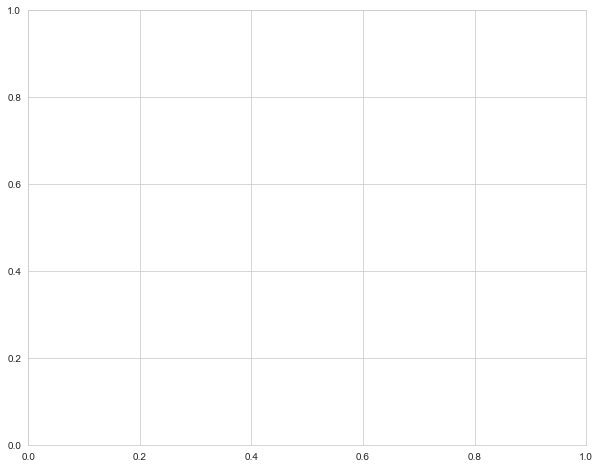

In [ ]:
plt.plot(ols_queens_coef[5:]['Year'],ols_queens_coef[5:]['Queens_Coef'], color='blue' )
plt.plot(ols_manhat_coef[5:]['Year'],ols_manhat_coef[5:]['manhat_Coef'], color='red' )
plt.plot(bronx_coef_df[5:]['Year'],bronx_coef_df[5:]['Bronx_Coef'], color='green' )
plt.plot(staten_coef_array[5:]['Year'],staten_coef_array[5:]['Staten_Coef'], color='orange' )
plt.plot(brooklyn_coef_df[5:]['Year'],brooklyn_coef_df[5:]['Brooklyn_Coef'], color='black' )
plt.title('New York City Housing Sales Price by Borough')
plt.show()

In [ ]:
# X = df_2003.drop(columns= ['ln_SALE_PRICE', 'year'],axis=1)
# y = df_2003['ln_SALE_PRICE']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=50)
# model = RandomForestClassifier(random_state=1)
# model.fit(X_train, y_train)
# model.perdict(y_test)

ValueError: Unknown label type: 'continuous'

In [ ]:
# y = df_2020['ln_SALE_PRICE']
# X = df_2020.drop(columns= 'ln_SALE_PRICE', axis=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=50)

In [ ]:

# X_test = df_2020.drop(columns= 'ln_SALE_PRICE', axis=1)
# y_test = df_2020['ln_SALE_PRICE']
# linear_reg = LinearRegression()
# linear_reg.fit(X_train, y_train)
# prediction = linear_reg.predict(X_test)
# print(f'Training Score: {linear_reg.score(X_train, y_train)}')
# print(f'Testing Score: {linear_reg.score(X_test, y_test)}')


## Linear Regression 


In [ ]:
# for df in enumerate(split):
#     y = df['ln_SALE_PRICE']
#     X = df.drop(columns= 'ln_SALE_PRICE', axis=1)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=50)

#     linear_reg = LinearRegression()
#     linear_reg.fit(X_train, y_train)
#     prediction = linear_reg.predict(X_test)
#     coef_arry = linear_reg.coef_()
#     print(f'Training Score: {linear_reg.score(X_train, y_train)}')
#     print(f'Testing Score: {linear_reg.score(X_test, y_test)}')

# # y[0]
# # coef_arry

In [ ]:
print(range(len(split)))

range(0, 17)


In [ ]:
     
# if split[range(len(split))] == split[0]:
#     print('this is df 0')
# else:
#     print('not df 0')


        

In [ ]:
# print(f'Coef: \n {(linear_reg.coef_)}')
# print(f'Mean squared error or accuracury score is: {mean_squared_error(y_test, prediction)}')
# print(f'The R^2 is: {r2_score(y_test, prediction)}')

# coef_arry = linear_reg.coef_

# # plt.plot(X_test, prediction, color='black')

In [ ]:
# coef_arry = pd.DataFrame(coef_arry)

# plt.subplot(122), sns.distplot(coef_arry)
# plt.show()



# plt.scatter(coef_arry)

## RESIDUAL PLOT 


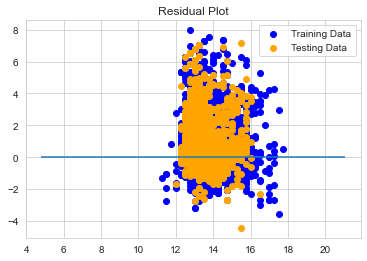

In [ ]:
plt.scatter(linear_reg.predict(X_train), linear_reg.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(linear_reg.predict(X_test), linear_reg.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

## Logstic Regression 
